In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tools.hyades_output_reader import createOutput
import ipywidgets as widgets

In [2]:
!ls data/demoA

demoA.inf      demoA.ppf      demoA.xlsx     demoA_Rho.dat  demoA_U.dat
demoA.otf      demoA.tmf      demoA_Pres.dat demoA_Te.dat


In [3]:
hyades = createOutput("./data/demoA/demoA", "Particle Velocity")

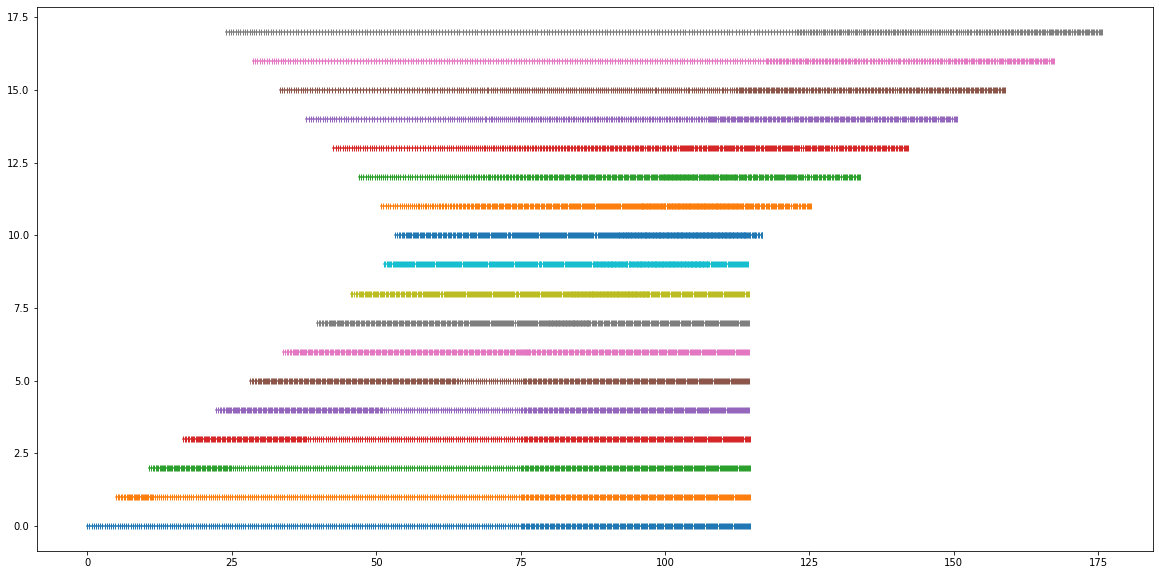

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
X = hyades.X

for i in range(len(hyades.time)-1):
    if i % 10 == 0:
        ax.plot(X, [i/10]*len(X), marker='|')
    dt = hyades.time[i+1] - hyades.time[i]
    X += hyades.output[:len(X), i] * dt
    
plt.show()

In [5]:
np.diff(hyades.time)

array([0.10883196, 0.09775083, 0.10078614, 0.09540042, 0.10466034,
       0.09374773, 0.09902604, 0.10150034, 0.10138219, 0.09843313,
       0.10108847, 0.09983151, 0.09961195, 0.09866552, 0.10126259,
       0.10042287, 0.09858783, 0.10101325, 0.09840634, 0.10029878,
       0.10116069, 0.10138242, 0.10092588, 0.09942243, 0.09841171,
       0.10145649, 0.10041133, 0.09970482, 0.09899103, 0.09903719,
       0.09862211, 0.10316027, 0.09875927, 0.09918881, 0.0989275 ,
       0.10351651, 0.09917561, 0.09967306, 0.09930787, 0.09965948,
       0.099408  , 0.09969503, 0.09949067, 0.10386183, 0.09943045,
       0.09968332, 0.09970669, 0.099452  , 0.09970722, 0.09928917,
       0.09960009, 0.09926635, 0.10364429, 0.09924915, 0.09944687,
       0.09938999, 0.09927488, 0.10029421, 0.09940819, 0.10217967,
       0.09717738, 0.10268521, 0.09966325, 0.0981394 , 0.10193976,
       0.10049623, 0.09745398, 0.09994438, 0.09958775, 0.10242914,
       0.0982245 , 0.10122223, 0.10080556, 0.09738612, 0.10021

<IPython.core.display.Javascript object>


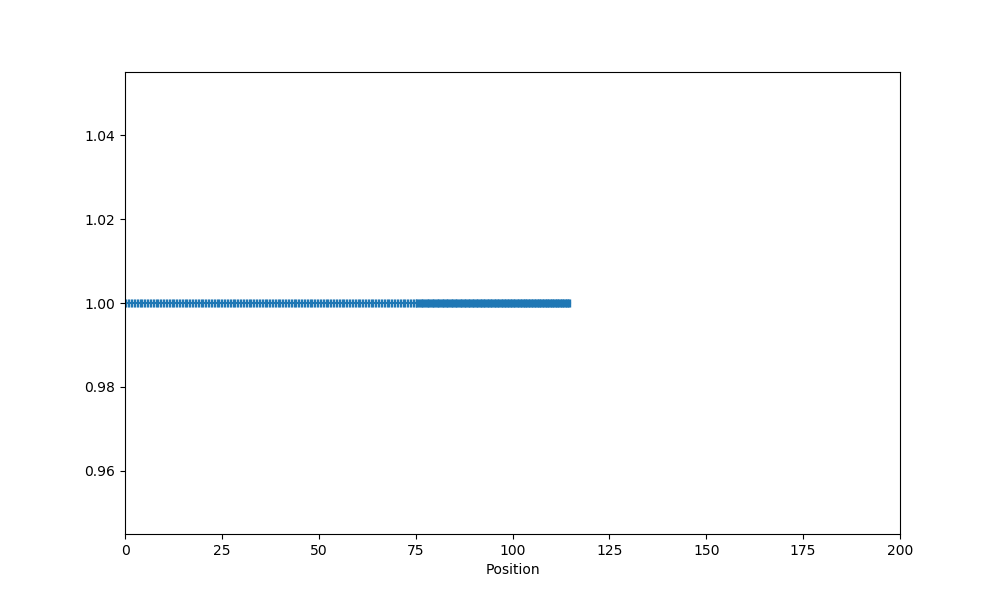

In [6]:
%matplotlib notebook
import copy

hyades = createOutput("./data/demoA/demoA", "Particle Velocity")

# X = hyades.X

fig, ax = plt.subplots(figsize=(10,6))
line, = ax.plot(hyades.X, [1]*len(hyades.X), marker="|")# use_line_collection=True,)
ax.set(xlabel="Position", xlim=(0,200))
plt.show()




def updatePlot(ix):
    dt = hyades.time[ix+1] - hyades.time[ix]
    hyades.X  += hyades.output[:len(hyades.X), ix] * dt
    line.set_xdata(hyades.X)
    fig.canvas.draw()


widget = widgets.widgets.IntSlider(
    value=0,
    min=0,
    max=len(hyades.time) - 2,
    step=1,
    description='Index:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
out = widgets.interactive_output(updatePlot, {'ix': widget})
widgets.HBox([widget, out])

<IPython.core.display.Javascript object>


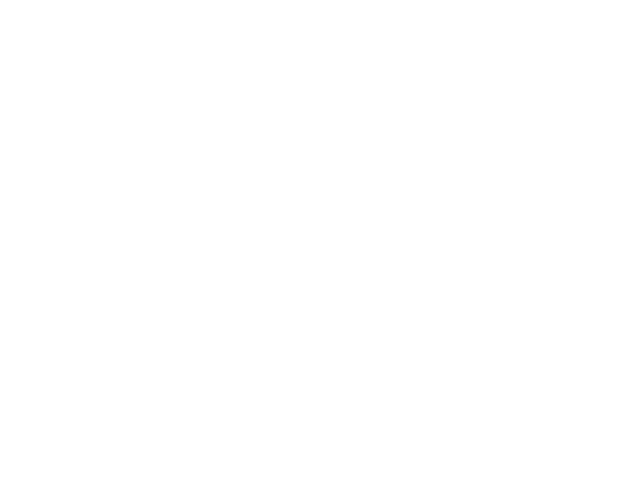

In [7]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

import numpy as np

N = 50
x = np.arange(N)
# Here are many sets of y to plot vs x
ys = [x + i for i in x]
#  ys = [1] * len(old_ys)
# ys = [1 for i in x]

# We need to set the plot limits, they will not autoscale
fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See :class:`matplotlib.collections.LineCollection` for more information

# Make a sequence of x,y pairs
line_segments = LineCollection([np.array([[i, 0],[i, 100]]) for i in x], #[np.column_stack([x, y]) for y in ys],
#                                linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
line_segments.set_array(x)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
# plt.sci(line_segments)  # This allows interactive changing of the colormap.
plt.show()

<IPython.core.display.Javascript object>


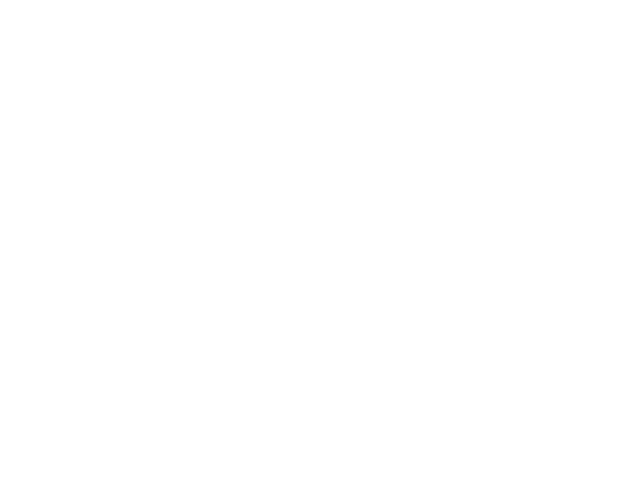

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.animation as animation
plt.style.use("ggplot")
# lines=[]
# for i in range(10):
#     for j in range(10):
#         lines.append([(0, i), (1, j)])
hyades = createOutput("./data/demoA/demoA", "Particle Velocity")
X = hyades.X#[::2]
# lines = [np.array([[x, 0],[x, 1]]) for x in X]
# colors = hyades.output[:len(hyades.X), 0][::5]
        
    
fig, ax = plt.subplots()
# col = LineCollection(lines, array=colors, cmap=plt.cm.magma)
# ax.add_collection(col)
# axcb = fig.colorbar(col) # colorbar
# ax.autoscale()
ax.set(title="Watch Hyades!", xlabel="Eulerian Distance (um)",
       xlim=(-10,200), ylim=(-0.1, 1.1))

interfaces = []
for mat in hyades.material_properties:
    x = hyades.material_properties[mat]['startX']
    line, = ax.plot((x, x), (0, 1), label=mat, lw=0.5)
    interfaces.append(line)

ims=[]
for i in range(0, len(hyades.time)-2):
    # Update position of each cell
    dt = hyades.time[i+1] - hyades.time[i]
    delta_X = hyades.output[:len(hyades.X), i] * dt
    X += delta_X#[::2]
    # Add positions to plot
    lines = [np.array([[x, 0],[x, 1]]) for x in X]
    col = LineCollection(lines, cmap=plt.cm.magma)
    # Color lines and add colorbar to plot
    colors = hyades.output[:len(hyades.X), i]#[::2]
#     colors[-1] = 500
    col.set_array(colors)
    # add material interfaces
#     for mat, line in zip(hyades.material_properties, interfaces):
#         mesh_ix = hyades.material_properties[mat]['startMesh']
#         line.set_xdata( (X[mesh_ix], X[mesh_ix]) )
    # Add plot to axis, add frame to animation, format plot
    im=ax.add_collection(col)
    ims.append([im])
ax.yaxis.set_visible(False)  
    
plt.legend()
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat=False)
plt.show()

In [9]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import os
# import matplotlib.animation as animation
# import matplotlib
from celluloid import Camera
import copy
from tools.hyades_output_reader import createOutput
plt.style.use("ggplot")
# "./data/trackingDemo3/trackingDemo3"
# "./data/demoA/demoA"
# "./data/rampDemo/rampDemo"
file = "./data/demoA/demoA"
hyades = createOutput(file, "Particle Velocity")
X = copy.deepcopy(hyades.X)
    
fig, ax = plt.subplots()
cbaxes = fig.add_axes([0.78, 0.25, 0.03, 0.5])
ax.set(title=f"{os.path.basename(file)} Recreation", xlabel="Eulerian Distance (um)",
       xlim=(-50, hyades.X.max() * 2.5), ylim=(-0.1, 1.1))
ax.yaxis.set_visible(False) 

color_var = "Rho"
colors_matrix = createOutput(file, color_var).output

if color_var=='Te':     label, units = 'Temperature', '(K)'
elif color_var=='Pres': label, units = 'Pressure', '(GPa)'
elif color_var=='U':    label, units = 'Particle Velocity', '(km/s)'
elif color_var=='Rho':  label, units = 'Density', '(g/cc)'


alpha = getAlphaFromTV(file)

camera = Camera(fig)
for i in range(0, len(hyades.time)-2):
    # Plot initial position lines
    y = (-0.05, 1.05)
    ax.plot((hyades.X[0], hyades.X[0]), y, color="black", linestyle="dashed", alpha=0.5)
    ax.plot((hyades.X[-1], hyades.X[-1]), y, color="black", linestyle="dashed", alpha=0.5)
    for mat in list(hyades.material_properties.keys())[1:]:
        initial_x = hyades.material_properties[mat]["startX"]
        ax.plot((initial_x, initial_x), y, color="green", linestyle="dashed", alpha=0.5)
    ax.text(hyades.X[-1]*1.05, 1.025, f"{hyades.time[i]:.1f} ns", ha="left")
    
    # Update position of each cell
    dt = hyades.time[i+1] - hyades.time[i]
    delta_X = hyades.output[:len(hyades.X), i] * dt
    X += delta_X
    
    # Add positions to plot
    lines = [np.array([[x, 0],[x, 1]]) for x in X]
    extra_color0 = np.array([[0, -1], [40, -1]])
    extra_color1 = np.array([[50, -1], [90, -1]])
    lines.append(extra_color0)
    lines.append(extra_color1)
    col = LineCollection(lines, cmap=plt.cm.magma)
    ax.add_collection(col)
    
    # Color each line based the values from the color variable
    colors = colors_matrix[:len(hyades.X), i]
    colors = np.concatenate((colors, [colors_matrix.max(), colors_matrix.min()]))
    col.set_array(colors)
    cb = fig.colorbar(col, cax = cbaxes)
    cb.set_label(f"{label} {units}", rotation=270, labelpad=10)
    
    # add material interfaces
    for mat in list(hyades.material_properties.keys())[1:]:
        mesh_ix = hyades.material_properties[mat]['startMesh'] - 1 
        line, = ax.plot((X[mesh_ix], X[mesh_ix]), (-0.05, 1.05), color='green')
    
    ### Set up the laser looking thing
    anchor = X[0]
    vertices = np.array([
                        [-10, 0.7],
                        [anchor,    0.6],
                        [anchor,    0.4],
                        [-10, 0.3]
                       ])
    polygon = Polygon(vertices, True)
    p = PatchCollection([polygon], alpha=alpha[i], color="red")
    ax.add_collection(p)
    camera.snap()
    
animation = camera.animate(interval=20, repeat=False)

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

NameError: name 'getAlphaFromTV' is not defined

In [ ]:
Writer = matplotlib.animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Me'), bitrate=1800)
out_fname = f"{os.path.basename(file)}_{color_var}_eulerian.mp4"
animation.save(f"./data/{out_fname}", dpi=200, writer=writer)

# MatLab from Ray for converting to Hyades Simulation to Eulerian coordinates
No idea how this works or what the plots from it look like

In [ ]:
clear all
close all
clc

In [ ]:
%% choose the mat file
[file, path]=uigetfile('C:\Jiang\HED\Pressure Ionization EP 2017\Hyades\Hyades_sims/*.mat','selectt mat file');
load([path,file])

%% time and z window
window_t = [7,12];
window_z = [20,43.5];

# Converting the mesh -> zone is averaging the hyades positions

In [ ]:
%% mesh coordinate -> zone coordinate
# r is just averaging the X coordinates
r = ( r(1:size(r,1)-1,:) + r(2:size(r,1),:) ) / 2;
rcm = rcm(2:size(rcm,1)-1, :); # where did rcm come from
r_ini = r(:,1); # the first column of r

# They want to check if the matrices are identical but this is a weird way
%% r and rcm should be the same
disp(['sum(sum(r-rcm))=', num2str(sum(sum(r-rcm)))])

%% get the coordinates
%x = linspace(min(min(r)), max(max(r)), size(r,1)*100)';
# X goes from -1e-2 to the max of the matrix r at 10 times the resolution of r
x = linspace(-100e-4,max(max(r)),size(r,1)*10)';
x_mesh = repmat(x,[1,size(r,2)]);

# t_mesh is a stack of the time vector? is time a vector it just appeared
%% time coordinate
t_mesh = repmat(time',[size(x,1),1]);
t = repmat(time',[size(r,1),1]);

%% remap var(t,r), var(t,rcm) into var(t,x)
rho_mesh_t_r   = zeros(size(t_mesh,1),size(t_mesh,2));
Te_mesh_t_r    = rho_mesh_t_r;
Ti_mesh_t_r    = rho_mesh_t_r;
ucm_mesh_t_r   = rho_mesh_t_r;
ni_mesh_t_r    = rho_mesh_t_r;
ne_mesh_t_r    = rho_mesh_t_r;
zbar_mesh_t_r  = rho_mesh_t_r;
pres_mesh_t_r  = rho_mesh_t_r;
qtot_mesh_t_r  = rho_mesh_t_r;
Tmelt_mesh_t_r = rho_mesh_t_r;

for i=1:length(time)
    if exist('Te','var')==1
        Te_mesh_t_r(:,i) = interp1(r(:,i), Te(:,i), x);
    end
    if exist('Ti','var')==1
        Ti_mesh_t_r(:,i) = interp1(r(:,i), Ti(:,i), x);
    end
    if exist('ucm','var')==1
        ucm_mesh_t_r(:,i) = interp1(r(:,i),ucm(:,i),x);
    end
    if exist('ni','var')==1
        ni_mesh_t_r(:,i) = interp1(r(:,i),ni(:,i),x);
    end
    if exist('ne','var')==1
        ne_mesh_t_r(:,i) = interp1(r(:,i),ne(:,i),x);
    end
    if exist('zbar','var')==1
        zbar_mesh_t_r(:,i) = interp1(r(:,i),zbar(:,i),x);
    end
    if exist('rho','var')==1
        rho_mesh_t_r(:,i) = interp1(r(:,i),rho(:,i),x);
    end
    if exist('pres','var')==1
        pres_mesh_t_r(:,i) = interp1(r(:,i),pres(:,i),x);
    end
    if exist('qtot','var')==1
        qtot_mesh_t_r(:,i) = interp1(r(:,i),qtot(:,i),x);
    end
    if exist('Tmelt','var')==1
        Tmelt_mesh_t_r(:,i) = interp1(r(:,i),Tmelt(:,i),x);
    end
end

%% conversion for plot
x_mesh = x_mesh*1e4;  %cm->um
t_mesh = t_mesh*1e9;  %s->ns
r_ini = r_ini*1e4;
time = time*1e9;
pres = pres / 1e10;   %dyne/cm^2 -> GPa
pres_mesh_t_r = pres_mesh_t_r/1e10;
Te = Te*1000;       %keV -> eV
Te_mesh_t_r = Te_mesh_t_r*1000;
Ti = Ti*1000;       %keV -> eV
Ti_mesh_t_r = Ti_mesh_t_r*1000;

# All their plotting

In [ ]:
%% plots
figure('Name','pres(t,r)')
pcolor(x_mesh',t_mesh',pres_mesh_t_r')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','GPa','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','pres(t,r_Lagrangian)')
pcolor(r_ini,time,pres')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','GPa','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','pres(t,r_Lagrangian), foil')
pcolor(r_ini(r_ini>=window_z(1)&r_ini<=window_z(2)),time(time>=window_t(1)&time<=window_t(2)),pres(r_ini>=window_z(1)&r_ini<=window_z(2),time>=window_t(1)&time<=window_t(2))')
shading flat
xlim(window_z);
ylim(window_t);
t=colorbar;
set(get(t,'ylabel'),'string','GPa','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','Rho(t,r)')
pcolor(x_mesh',t_mesh',rho_mesh_t_r')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','g/cm^3','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','Rho(t,r_Lagrangian)')
pcolor(r_ini,time,rho')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','g/cm^3','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','Rho(t,r_Lagrangian), foil')
pcolor(r_ini(r_ini>=window_z(1)&r_ini<=window_z(2)),time(time>=window_t(1)&time<=window_t(2)),rho(r_ini>=window_z(1)&r_ini<=window_z(2),time>=window_t(1)&time<=window_t(2))')
shading flat
xlim(window_z);
ylim(window_t);
t=colorbar;
set(get(t,'ylabel'),'string','g/cm^3','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','Te(t,r)')
pcolor(x_mesh',t_mesh',Te_mesh_t_r')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','eV','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','Te(t,r_Lagrangian)')
pcolor(r_ini,time,Te')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','eV','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','Te(t,r_Lagrangian), foil')
pcolor(r_ini(r_ini>=window_z(1)&r_ini<=window_z(2)),time(time>=window_t(1)&time<=window_t(2)),Te(r_ini>=window_z(1)&r_ini<=window_z(2),time>=window_t(1)&time<=window_t(2))')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','eV','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

figure('Name','Te(t,r_Lagrangian), foil+back C')
pcolor(r_ini(r_ini>=window_z(1)),time(time>=window_t(1)&time<=window_t(2)),Te(r_ini>=window_z(1),time>=window_t(1)&time<=window_t(2))')
shading flat
t=colorbar;
set(get(t,'ylabel'),'string','eV','FontSize',16)
set(gca,'FontSize',16)
colormap jet
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('t (ns)','FontSize',16)

%% take a lineout
probe_time = 11.3;
[tmp, Ind] = min(abs(time-probe_time));
if time(Ind)>probe_time
    Ind = Ind-1;
end

probe_rho = rho(:,Ind)+(probe_time-time(Ind))/(time(Ind+1)-time(Ind))*(rho(:,Ind+1)-rho(:,Ind));
probe_pres = pres(:,Ind)+(probe_time-time(Ind))/(time(Ind+1)-time(Ind))*(pres(:,Ind+1)-pres(:,Ind));

%figure('Name','Rho(r_Lagrangian) at probe time')
figure(101)
hold all
plot(r_ini, probe_rho, 'LineWidth',2)
xlim(window_z);
set(gca,'FontSize',16)
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('\rho (g/cm^3)','FontSize',16)
title(['probe time = ',num2str(probe_time),'ns'],'FontSize',16)

%figure('Name','pres(r_Lagrangian) at probe time')
figure(102)
plot(r_ini, probe_pres, 'LineWidth',2)
xlim(window_z);
set(gca,'FontSize',16)
xlabel('x_L_a_g_r_a_n_g_i_a_n (\mum)','FontSize',16)
ylabel('pressure (GPa)','FontSize',16)
title(['probe time = ',num2str(probe_time),'ns'],'FontSize',16)

%% the position of the back surface
material_back = 43.5e-4;    %cm
[tmp, Ind] = min(abs(r(:,1)-material_back));
figure('Name', 'position of back surface')
hold all
plot(time, r(end,:)*1e4, 'LineWidth', 2)
plot(time, r(Ind,:)*1e4, 'LineWidth', 2)
legend('diamond back surface','material back surface')
set(gca,'FontSize',16)
xlabel('t (ns)','FontSize',16)
ylabel('x (\mum)','FontSize',16)

%% plot the velocity of back surface
figure('Name', 'velocity of back surface')
hold all
plot((time(1:end-1)+time(2:end))/2, diff(r(end,:)'*1e4)./diff(time), 'LineWidth', 2)
plot((time(1:end-1)+time(2:end))/2, diff(r(Ind,:)'*1e4)./diff(time), 'LineWidth', 2)
legend('diamond back surface','material back surface')
set(gca,'FontSize',16)
xlabel('t (ns)','FontSize',16)
ylabel('v (km/s)','FontSize',16)

%%
figure(1000)
plot(time,mean(rho(r_ini>=23.5 & r_ini<=43.5, :), 1))
xlim([6,13])